In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("CA_FF_LQ_ZIP_05_15.xlsx")

ZIP (obvious)

YEARS – number of years with data

ALL – “Total Number of Businesses in ZIP Code”

LSR – “Limited Service Restaurants in ZIP Code”  - this is the government classification for fast food (no waiters)

LQ – Location Quotient  - a measure of the density of fast food businesses to all other businesses based on the county-wide average. 

 

An LQ of 1.0  means “this zip code has the same ratio of fast food businesses to all businesses as the county”.   LQ values greater than 1.0 indicate a greater density than the average.  LQ values of under 1.0  mean less density of fast food.

 

It’s a better measure than pure numbers, or even a rate per person because it accounts for tourist districts, etc.

In [3]:
df

,ZIP,YEARS,ALL05,LSR05,ALL10,LSR10,ALL15,LSR15,LQ05,LQ10,LQ15
0,90001,3,645,19,576,29,598,28,1.019623,1.668855,1.449292
1,90002,3,163,8,149,9,166,10,1.698823,2.002163,1.864623
2,90003,3,434,21,427,26,430,31,1.674848,2.018314,2.231476
3,90004,3,1009,23,1049,34,1135,32,0.789010,1.074352,0.872676
4,90005,3,602,23,588,19,695,25,1.322444,1.071074,1.113408
...,...,...,...,...,...,...,...,...,...,...,...
2534,96157,3,7,0,3,0,3,0,0.000000,0.000000,0.000000
2535,96158,3,43,0,27,0,21,0,0.000000,0.000000,0.000000
2536,96160,3,113,2,74,1,65,1,0.612629,0.447931,0.476196
2537,96161,3,687,10,715,13,832,17,0.503836,0.602671,0.632448


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2538
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     2400 non-null   int64  
 1   YEARS   2400 non-null   int64  
 2   ALL05   2400 non-null   int64  
 3   LSR05   2400 non-null   int64  
 4   ALL10   2400 non-null   int64  
 5   LSR10   2400 non-null   object 
 6   ALL15   2400 non-null   int64  
 7   LSR15   2400 non-null   int64  
 8   LQ05    2400 non-null   float64
 9   LQ10    2400 non-null   float64
 10  LQ15    2400 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 225.0+ KB


In [6]:
## Want to compare differnt communities and how Obesity looks. 
# Areas in interest: 
Malibu = [90263, 90264, 90265]
Pacoima = [91331 , 91333, 91334]
Canoga_Park = [91303, 91304, 91305, 91306, 91307, 91308, 91309,91396]
Northridge = [91325]
Panorama_City = [91402] 
Reseda = [91335, 91337, 91324, 91325, 91356, 91306, 91357]
Van_Nuys = [91401, 91405, 91406, 91409, 91411]

In [7]:
# Returns subset of dateframe based on area zipcode 
def zipCodeInDf(area, Location):
    sub = pd.DataFrame()
    for i in area:
        sub = sub.append(df[df["ZIP"] == i])
    loc = (np.array((sub.shape[0]) * [Location]))
    sub["Location"] = loc    
    return sub
        
    

In [8]:
subsetDF = pd.DataFrame()

In [9]:
# Malibu subset
subsetDF = subsetDF.append(zipCodeInDf(Malibu, "Malibu"))
# Pacoima subset 
subsetDF = subsetDF.append(zipCodeInDf(Pacoima, "Pacoima"))
# Canoga Park subset
subsetDF = subsetDF.append(zipCodeInDf(Canoga_Park, "Canoga Park"))
# Northridge subset 
subsetDF = subsetDF.append(zipCodeInDf(Northridge, "Northridge"))
# Panorama City subset
subsetDF = subsetDF.append(zipCodeInDf(Panorama_City, "Panorama City"))
# Reseda subset 
subsetDF = subsetDF.append(zipCodeInDf(Reseda, "Reseda"))
# Van Nuys subset
subsetDF = subsetDF.append(zipCodeInDf(Van_Nuys, "Van Nuys"))

In [10]:
subsetDF

,ZIP,YEARS,ALL05,LSR05,ALL10,LSR10,ALL15,LSR15,LQ05,LQ10,LQ15,Location
126,90263,3,9,0,14,1,17,0,0.000000,2.367637,0.000000,Malibu
127,90264,3,11,0,8,0,6,0,0.000000,0.000000,0.000000,Malibu
128,90265,3,913,14,950,13,1018,13,0.530766,0.453589,0.395271,Malibu
355,91331,3,823,37,835,41,857,45,1.556137,1.627573,1.625290,Pacoima
356,91333,3,5,0,4,0,2,0,0.000000,0.000000,0.000000,Pacoima
333,91303,3,974,40,985,39,1049,49,1.421500,1.312416,1.445838,Canoga Park
334,91304,3,911,24,863,23,878,22,0.911882,0.883406,0.775581,Canoga Park
335,91305,3,9,0,5,0,8,0,0.000000,0.000000,0.000000,Canoga Park
336,91306,3,424,19,433,20,465,19,1.551078,1.531036,1.264736,Canoga Park
337,91307,3,588,9,616,17,676,14,0.529799,0.914769,0.641033,Canoga Park


In [14]:
locationDF = subsetDF.groupby('Location').mean()

In [15]:
locationDF

,ZIP,YEARS,ALL05,LSR05,ALL10,ALL15,LSR15,LQ05,LQ10,LQ15
Location,,,,,,,,,,
Canoga Park,91317.250000,3.0,366.875000,11.500000,365.750000,386.375000,13.000000,0.551782,0.898924,0.515898
Malibu,90264.000000,3.0,311.000000,4.666667,324.000000,347.000000,4.333333,0.176922,0.940409,0.131757
Northridge,91325.000000,3.0,668.000000,21.000000,710.000000,693.000000,29.000000,1.088150,1.353888,1.295281
Pacoima,91332.000000,3.0,414.000000,18.500000,419.500000,429.500000,22.500000,0.778068,0.813787,0.812645
Panorama City,91402.000000,3.0,685.000000,40.000000,657.000000,732.000000,50.000000,2.021228,2.270337,2.114258
Reseda,91334.285714,3.0,770.714286,19.857143,753.285714,770.142857,26.857143,0.743955,0.796920,0.831368
Van Nuys,91406.400000,3.0,817.200000,20.000000,781.000000,849.600000,20.200000,0.721645,0.741921,0.612395


In [37]:
Locations = ['Canoga Park', 'Malibu', 'Northridge', 'Pacoima', 'Panorama City','Reseda', 'Van Nuys']
LQ05 = locationDF["LQ05"]
LQ10 = locationDF["LQ10"]
LQ15 = locationDF["LQ15"]

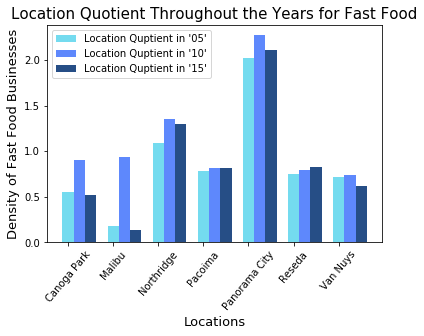

In [77]:
X_axis = np.arange(len(Locations))
  
N = len(Locations)
ind = np.arange(N) 
width = 0.25

bar1 = plt.bar(ind, LQ05, width, color = '#74DBEF', label="Location Quptient in '05'")
bar2 = plt.bar(ind+width, LQ10, width, color='#5E88FC', label="Location Quptient in '10'")
bar3 = plt.bar(ind+width*2, LQ15, width, color = '#264E86', label="Location Quptient in '15'")   
    
plt.xticks(X_axis, Locations, rotation = 50)
plt.xlabel("Locations", fontsize = 13)
plt.ylabel("Density of Fast Food Businesses", fontsize = 13)
plt.title("Location Quotient Throughout the Years for Fast Food", fontsize =15)
plt.legend()
plt.show()